 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [109]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [110]:
# Setting up the path for csv files and deployed the pandas' reader to read the csv file for Whales's funds
csvpath_whale = Path ("whale_returns.csv")

# Deploying the pandas' reader to read the csv file for Whales's funds and set the "Date" column as the 
# index column, and convince pandas to turn "date" into real datetime types
whale_df = pd.read_csv (csvpath_whale, index_col="Date", parse_dates=True, infer_datetime_format=True)

# sort the dataframe with index column "date" in ascending order
whale_df = whale_df.sort_index()

In [111]:
# Reading whale returns
whale_df.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [112]:
# Count nulls within the dataframe of Whales' funds
whale_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [113]:
# Drop any nulls' entries within the Whales' funds
whale_df=whale_df.dropna().copy()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [114]:
# Setting up the path for csv files to be read for Algorithmic returns and deployed the pandas' reader to read the csv file for the Algo's funds
csvpath_algo = Path ("algo_returns.csv")
algo_df = pd.read_csv (csvpath_algo, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df = algo_df.sort_index()


In [115]:
# Count nulls within the dataframe of Algos' funds
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [116]:
# Drop any nulls' entries within the Aglos' funds
algo_df=algo_df.dropna().copy()
algo_df.isnull().sum()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [117]:
# Setting up the path for csv file to be read for SPTSX and deployed the pandas' reader to read the csv file 
# for S&P TSX 60 Closing Prices
csvpath_sptsx = Path ("sp_tsx_history.csv")
sptsx_df = pd.read_csv (csvpath_sptsx, index_col="Date", parse_dates=True, infer_datetime_format=True)
sptsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [118]:
# Check Data Types for the dataframe's data to ensure the "close" column in SPTSX dataframe is the correct
# data type for computation
sptsx_df.dtypes


Close    object
dtype: object

In [119]:
# Fix Data Types for the "Close" column to be a float datatype

sptsx_df["Close"] = sptsx_df["Close"].str.replace("$","")
sptsx_df["Close"] = sptsx_df["Close"].str.replace(",","")

# sort the SPTSX dataframe with index column "date" in ascending order
sptsx_df = sptsx_df.sort_index()
sptsx_df_float = sptsx_df.astype({"Close":float})
sptsx_df_float.head() 

<ipython-input-119-a9c64ec0a262>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sptsx_df["Close"] = sptsx_df["Close"].str.replace("$","")


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [120]:
# Using the existing SPTSX dataframe with closing price data to calculate Daily Returns for SPTSX
sptsx_daily_return = sptsx_df_float.pct_change()
sptsx_daily_return.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [121]:
# Screen out any nulls data entries and any drop nulls within the dataframe of SPTSX 
sptsx_daily_return = sptsx_daily_return.dropna().copy()
sptsx_daily_return.isnull().sum()
sptsx_daily_return.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [122]:
# Rename `Close` Column to be specific to this portfolio.
sptsx_daily_return.columns = ["SPTSX"]
sptsx_daily_return.head()

 

,SPTSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [123]:
# Using the panda's concat function to combine Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns
# into a single DataFrame with columns for each portfolio's returns.
combined_portfolio_return=pd.concat ([whale_df,algo_df,sptsx_daily_return], axis="columns", join ="inner")

# After concatenation of all the dataframes, the combined datafram is to be sorted with the index column "date"
# to ensure the date is in ascending order for future computation 
combined_portfolio_return.sort_index()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Rate of return for each portfolio from year 2015 to 2019'}, xlabel='Time', ylabel='Rate of return for the portfolio'>

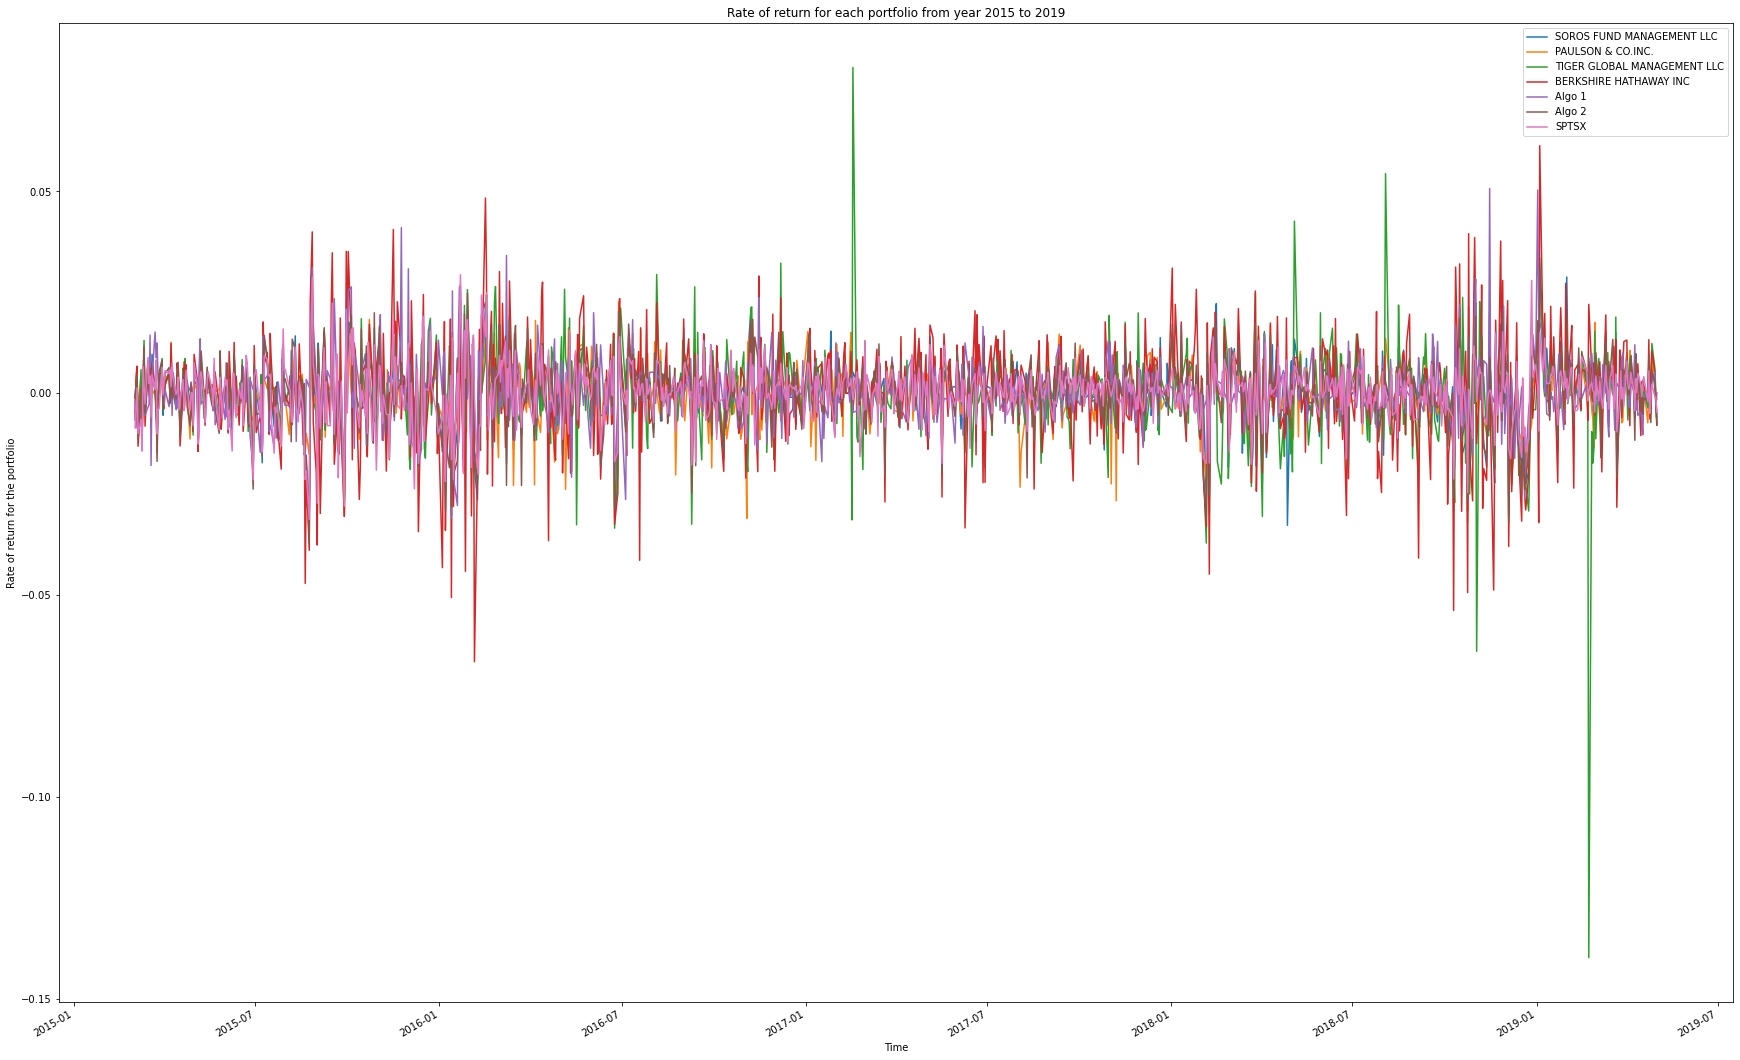

In [124]:
# Using Plot function to plot daily returns of all portfolios with x-axis is Date and y axis is rate of return for each of the portfolio
combined_portfolio_return.plot(figsize=(30,20), title ="Rate of return for each portfolio from year 2015 to 2019", xlabel="Time",ylabel="Rate of return for the portfolio")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative return for each portfolio from year 2015 to 2019'}, xlabel='Time', ylabel='Cumulative rate of return for the portfolio'>

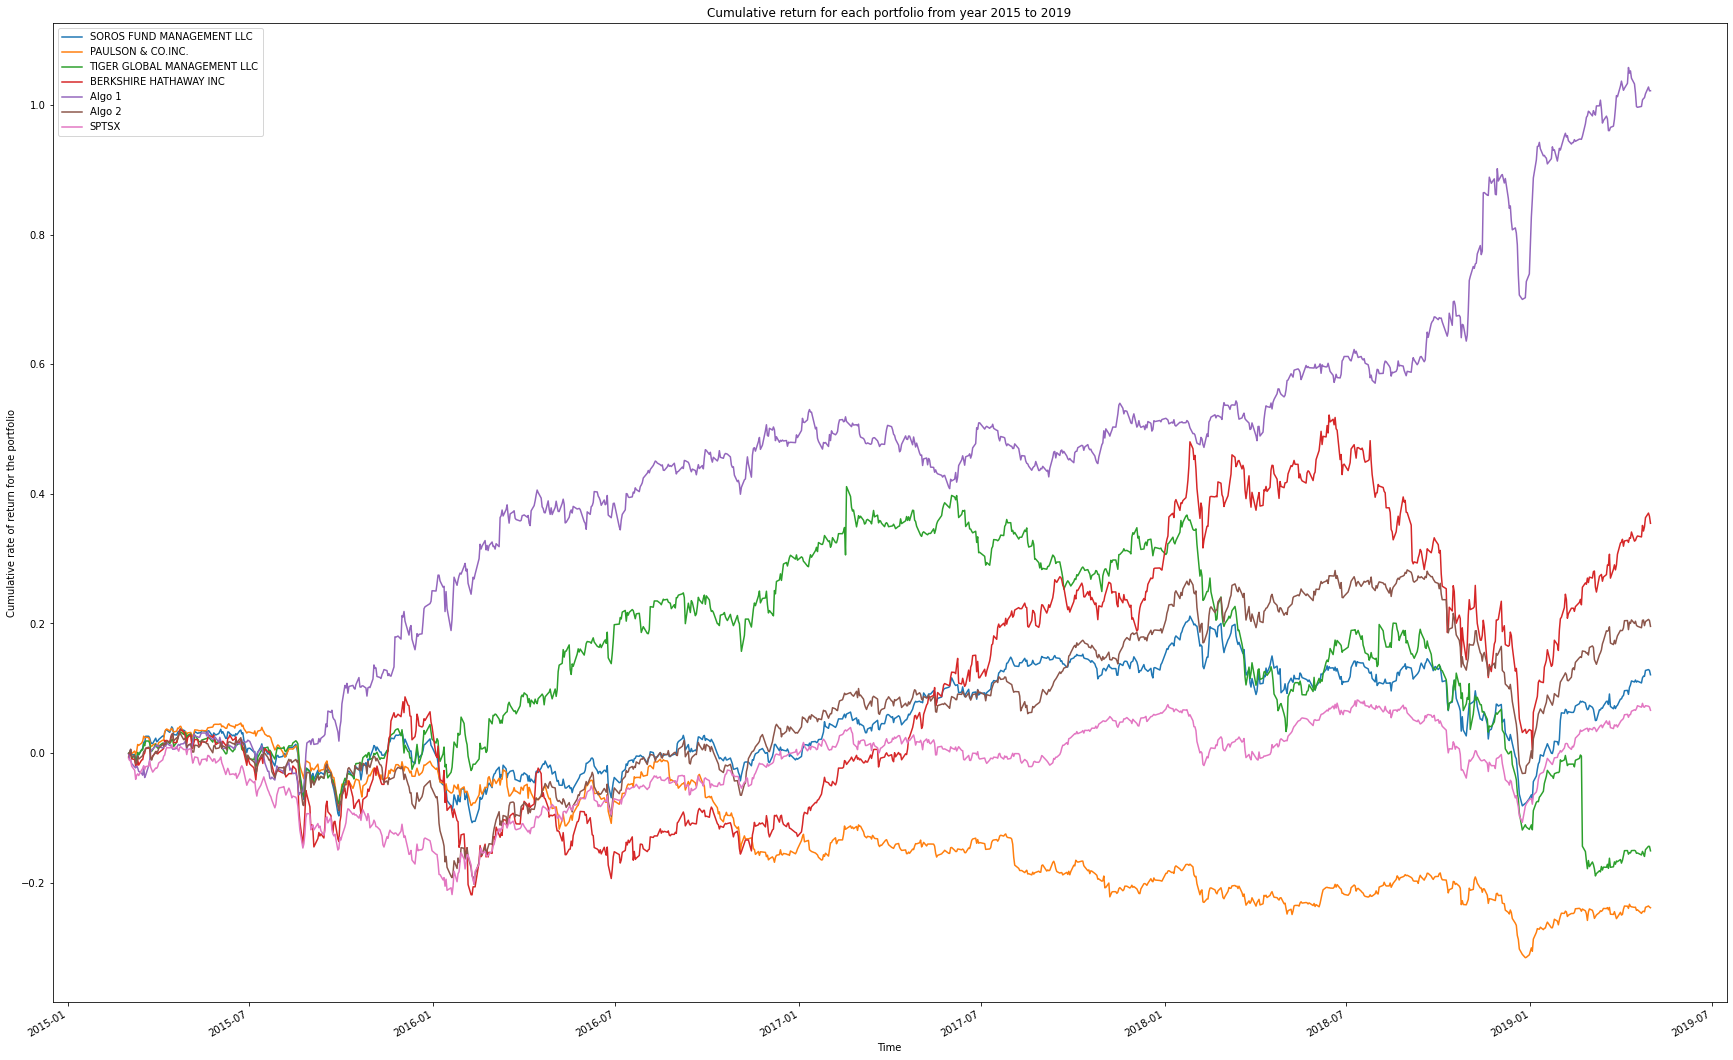

In [125]:
# Using cumprod function in pandas to calculate cumulative returns for each of the portfolios
cumulative_return = ((1+combined_portfolio_return).cumprod())-1
cumulative_return.head()
# Plot cumulative returns with x-axis is Date and y axis is cumulative return rate for each of the portfolio
cumulative_return.plot(figsize=(30,20), title ="Cumulative return for each portfolio from year 2015 to 2019", xlabel="Time",ylabel="Cumulative rate of return for the portfolio")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Box plot for each of the portfolio'}, ylabel='Distribution of the return'>

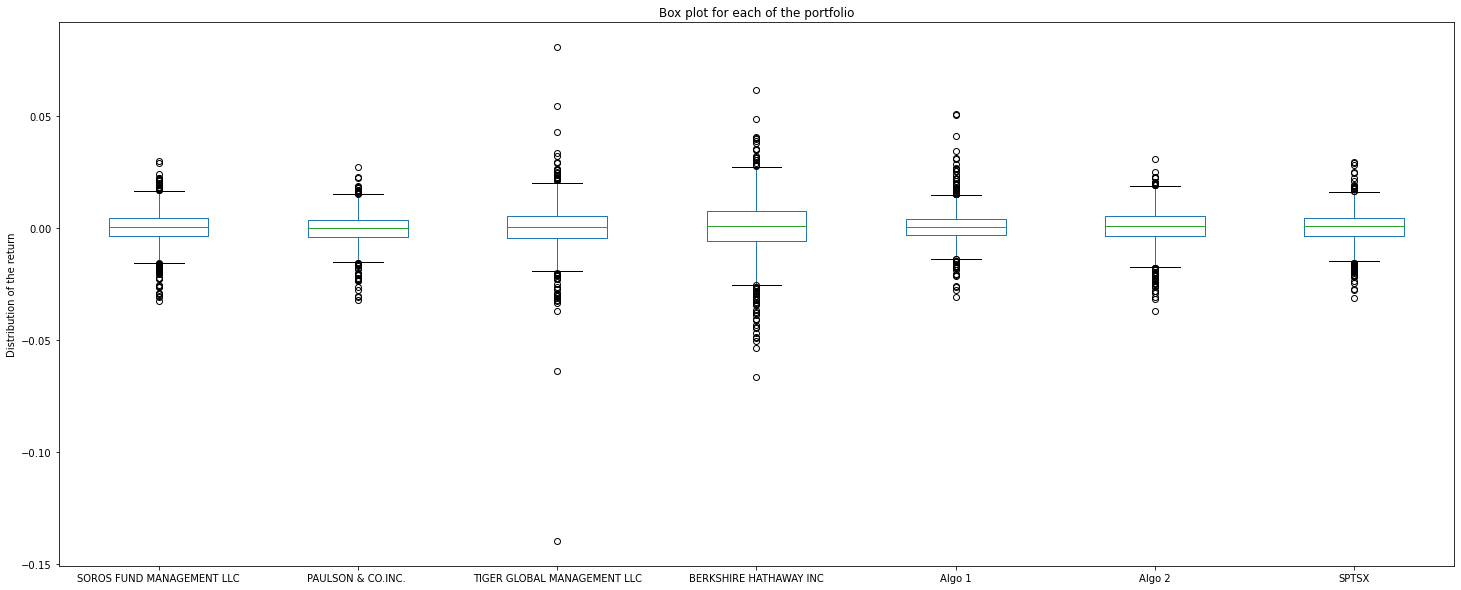

In [126]:
# Deploying Box plot function to visually show risk with x-axis is the portfolio name and y axis is the distribution for each of the portfolio's return
combined_portfolio_return.plot.box(figsize=(25,10), title ="Box plot for each of the portfolio", xlabel = "Portfolio Name", ylabel = "Distribution of the return")

### Calculate Standard Deviations

In [127]:
# Using std function in pandas to calculate the daily standard deviations of all portfolios
portfolio_daily_std=combined_portfolio_return.std()
portfolio_daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SPTSX                          0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [128]:
# Calculate  the daily standard deviation of S&P TSX 60

# Using sort to arrange the portfolios dataframe in acending order in term of standard deviation
portfolio_daily_std_sort = portfolio_daily_std.sort_values()
portfolio_daily_std_sort

PAULSON & CO.INC.              0.006982
SPTSX                          0.007034
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

In [129]:
# Determine which portfolios are riskier than the S&P TSX 60 and using drop to eliminate portfolios have standard deviation equals to or less than S&P TSX 60 
portfolio_riskier_than_SPTSX = portfolio_daily_std_sort.drop(portfolio_daily_std_sort.index[0:2])
portfolio_riskier_than_SPTSX
 

Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Calculate the Annualized Standard Deviation

In [130]:
# Calculate the annualized standard deviation (252 trading days) with the square root function in numpy to annualize the daily standard deviation
portfolio_annualized_std = portfolio_daily_std*np.sqrt(252)
portfolio_annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
SPTSX                          0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation for each portfolio'}, xlabel='Date', ylabel='21 Day of Rolling standard deviations'>

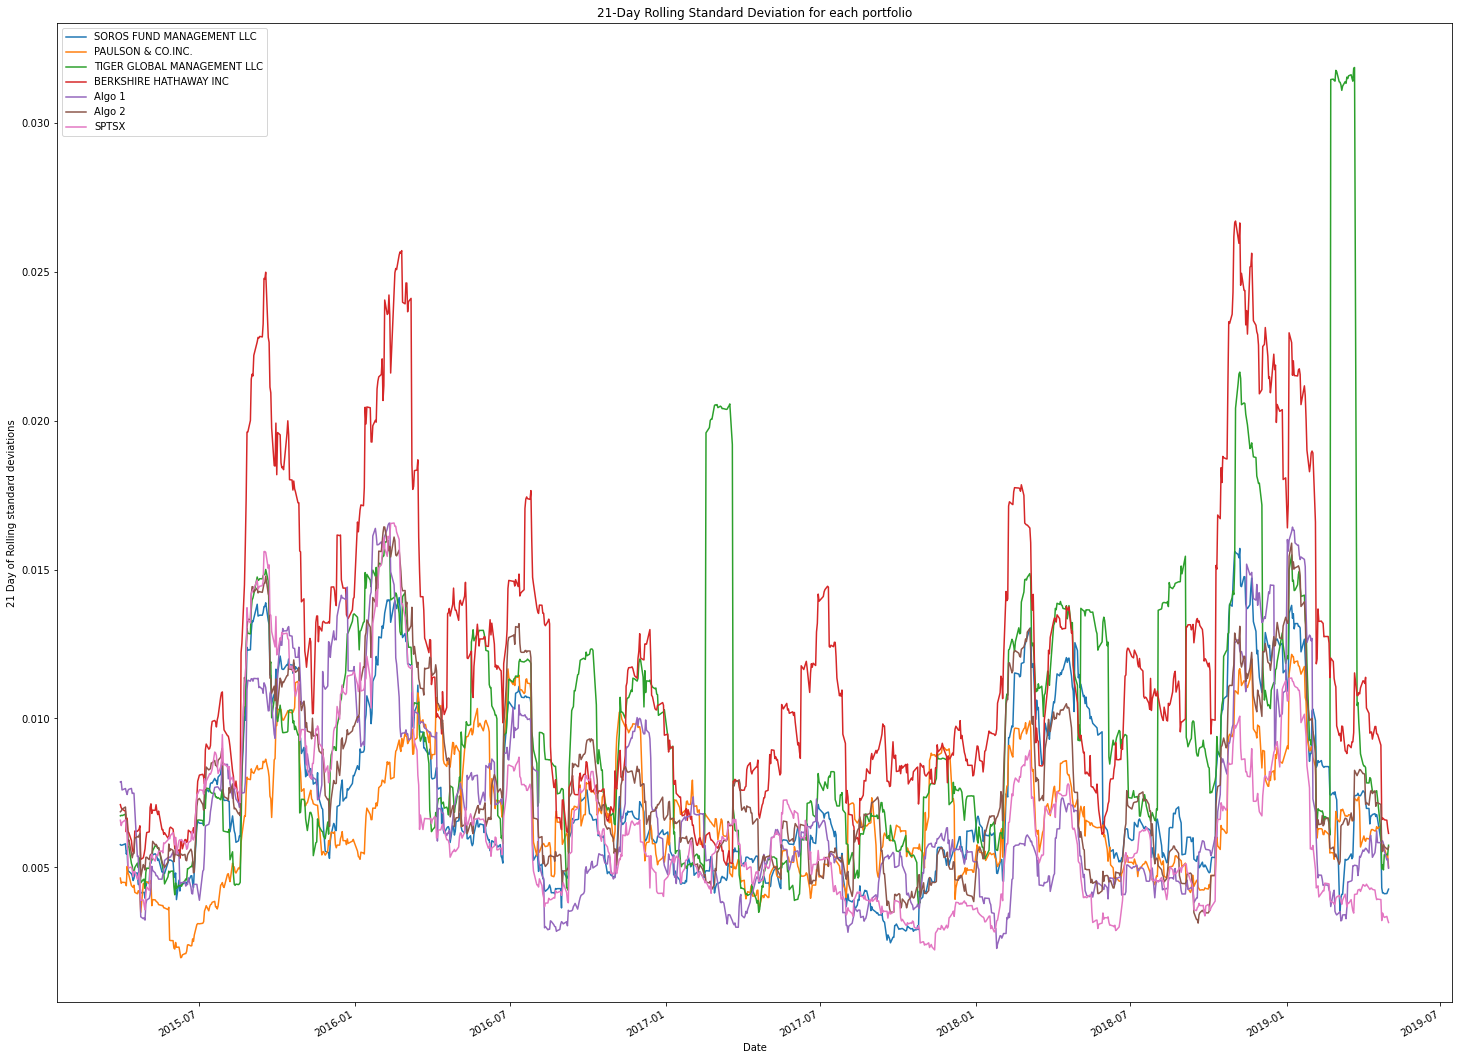

In [131]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21 = combined_portfolio_return.rolling(window=21).std()
# Plot the rolling standard deviation with x-axis is Date and y axis is 21 days' rolling standard deviation for each of the portfolio
rolling_std_21.plot(figsize=(25,20),title="21-Day Rolling Standard Deviation for each portfolio", ylabel ="21 Day of Rolling standard deviations")

### Calculate and plot the correlation

<AxesSubplot:>

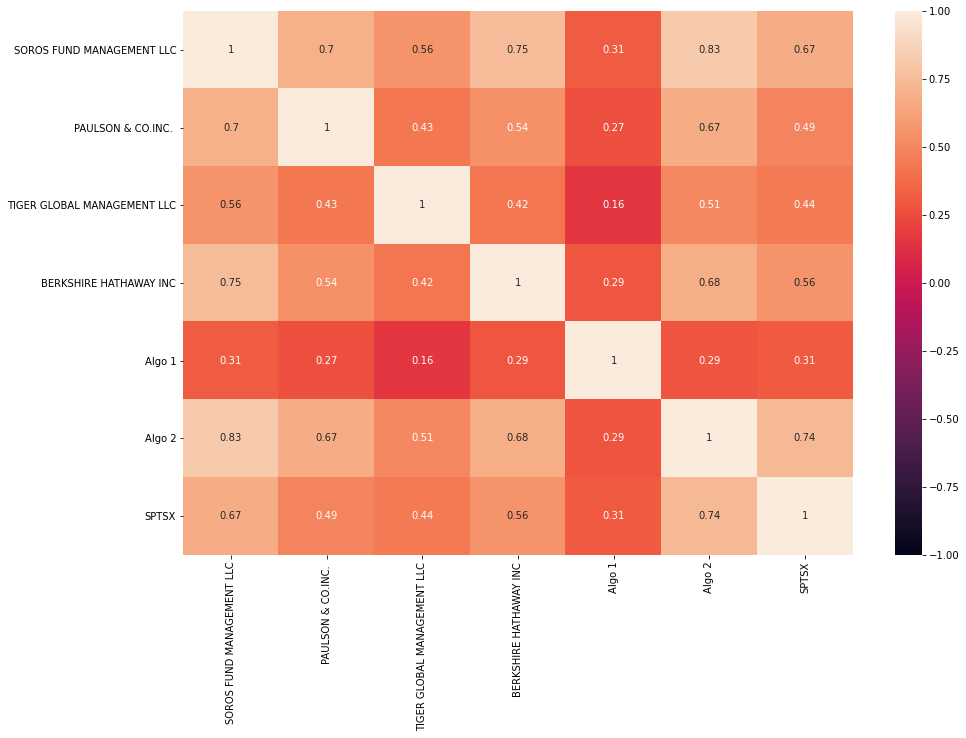

In [132]:
# Calculate the correlation among all portfolios by the function of corr() and using matplotlib to enlarge the output of heatmap for the results of correlation
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
correlation = combined_portfolio_return.corr()
correlation
# Display the correlation matrix using the heatmap with the visual tool of seaborn to plot the correlation matrix
import seaborn as sns
sns.heatmap(correlation,vmin=-1, vmax=1, annot = True)


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

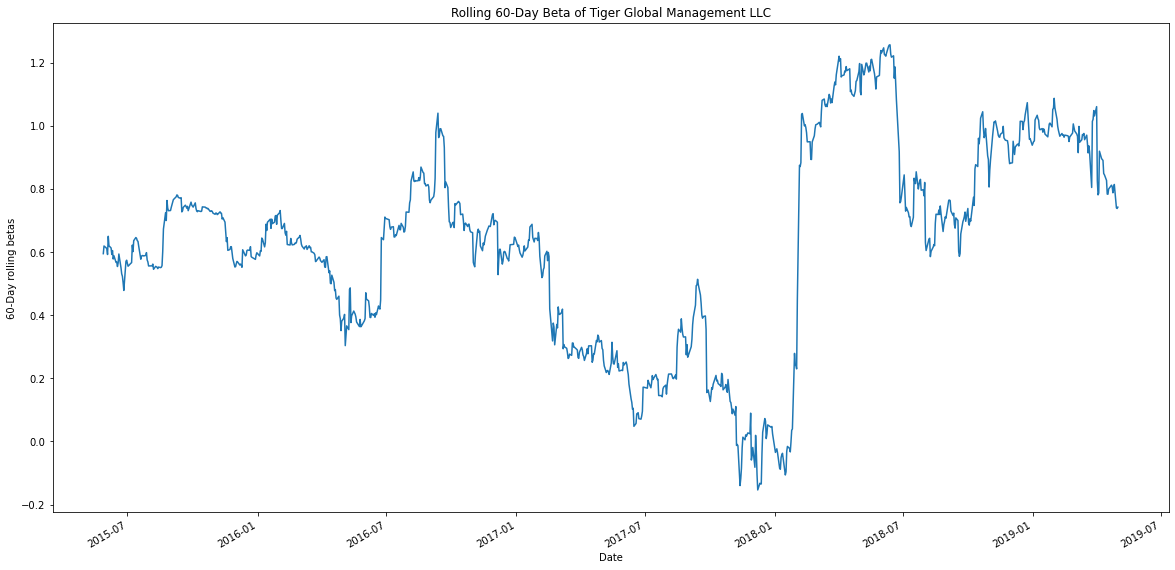

In [133]:
# Tiger Global Management LLC is selected to calculate covariance with the market benchmark S&P TSX60 
# Using the rolling function with window of 60 days and the cov() function to determine the rolling covariance between Tiger Global Management LLC and S&P TSX60
rolling_convariance_tiger = combined_portfolio_return["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(combined_portfolio_return["SPTSX"])
# Calculate variance of S&P TSX using the var() function to compute the rolling variance for S&P TSX 60
rolling_variance_SPTSX = combined_portfolio_return["SPTSX"].rolling(window=60).var()
# Rolling beta for Tiger Global Management LLC is computed by dividing rolling covariance of tiger with SPTSX 60 from rolling variance of SPTSX60
rolling_tiger_beta = rolling_convariance_tiger/rolling_variance_SPTSX
# Plotting rolling beta trend with x axis equals to Date and y axis equals to rolling beta (60 days)
ax = rolling_tiger_beta.plot(figsize=(20,10), title = "Rolling 60-Day Beta of Tiger Global Management LLC", ylabel = "60-Day rolling betas")


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [134]:
# Using `ewm` function to calculate the rolling window of 60 days with exponetially weighted average, and the timeframe is 21 days for halflife in the parameter field for ewm function
portfolio_21_emw = combined_portfolio_return.ewm(halflife=21).mean()
portfolio_21_emw

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.005908
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.003410
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005133
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.005436
...,...,...,...,...,...,...,...
2019-04-25,0.001277,0.000032,-0.001058,0.001860,0.000625,0.000876,0.001018
2019-04-26,0.001500,0.000329,-0.000622,0.002138,0.000702,0.001018,0.001058
2019-04-29,0.001492,0.000406,-0.000399,0.002238,0.000848,0.001077,0.000998


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [135]:
# Annualized Sharpe Ratios
#Assumption: Risk-free is near zero in the low interest rate environment, so we will assume risk free rate would be zero in our calculation, and the rate of return of each portfolio has to be annualized 
# 252 trading days and the denominator also has to be annualized with 252 days to compute the annual Sharpe Ratio for each portfolio

sharpe_ratio = (combined_portfolio_return.mean()-0)*252/(combined_portfolio_return.std()*np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SPTSX                          0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio for the portfolio'}, xlabel='Portfolio name', ylabel='Sharpe Ratio'>

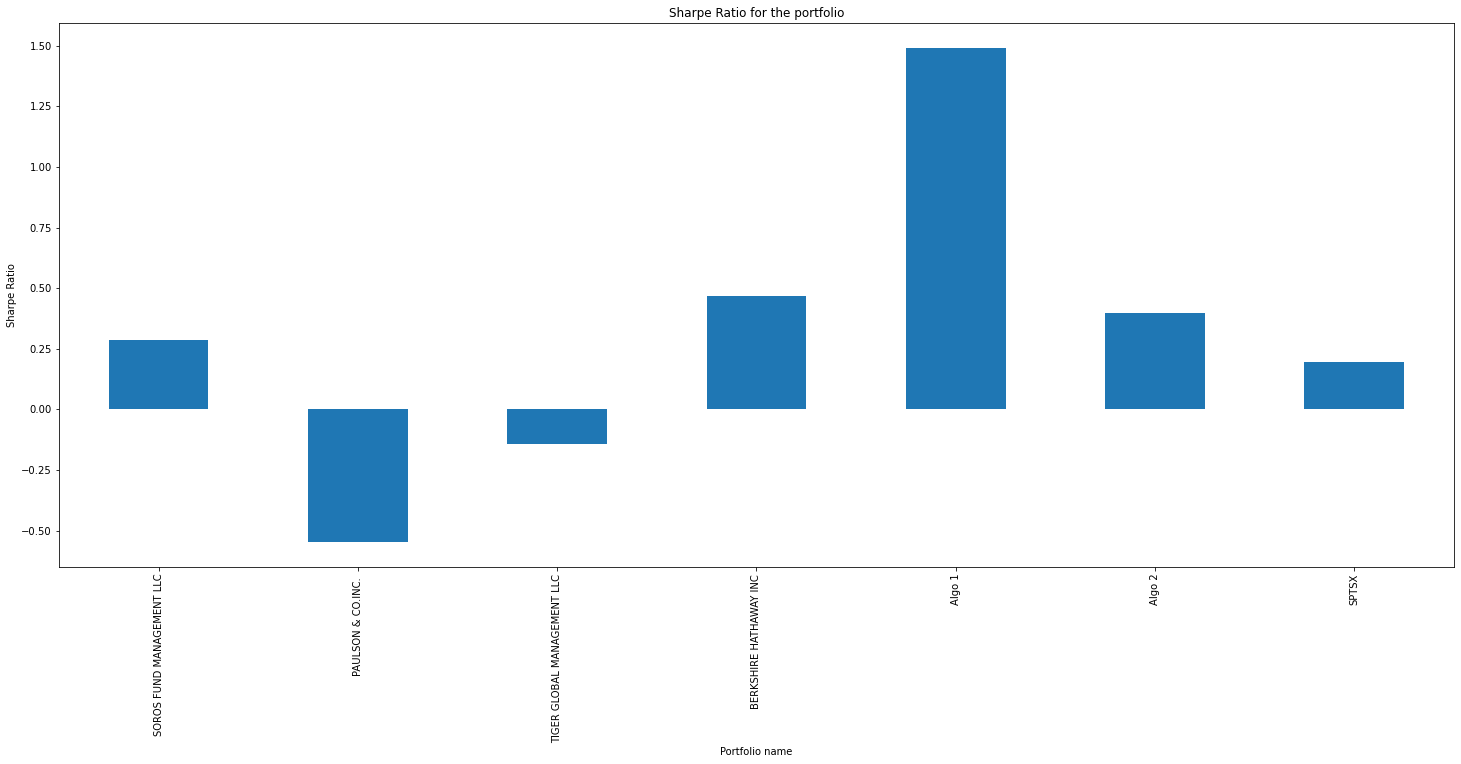

In [136]:
# Visualize the sharpe ratios as a bar plot with x axis equals to porfolio name and y axis equals to Sharpe Ratio
sharpe_ratio.plot(kind="bar", title ="Sharpe Ratio for the portfolio", figsize=(25,10), xlabel ="Portfolio name", ylabel="Sharpe Ratio")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.
Assumption: Risk-free rate has been close to zero in the low interest rate environment in the recent years, so we will assume risk free rate would be zero in our calculation of Sharpe Ratio.
In accordance with Sharpe Ratio results, Algo Strategies generally outperform the market and the whale porfolios.  With the highest Sharpe Ratio, Algo 1's performance was far more supreme over the performances of other portfolios.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [137]:
# 3 stocks are being selected: Royal Bank of Canada (RY.TO), Suncor Energy (SU.TO), and Square (SQ)
# Setting up the path for csv files of the 1st selected stock
csvpath_ry = Path ("RY.TO.csv")

# Deploying the pandas' reader to read the csv file for Royal Bank (RY) and set the "Date" column as the 
# index column, and convince pandas to turn "date" into real datetime types
ry_df = pd.read_csv (csvpath_ry, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Using drop function to drop irrelevant columns in the dataframe
ry_df = ry_df.drop(columns =["Open","High","Low", "Adj Close","Volume"])
ry_df.head()

,Close
Date,
2016-01-04,73.040001
2016-01-05,72.820000
2016-01-06,71.570000
2016-01-07,70.250000
2016-01-08,70.070000


In [138]:
# Setting up the path for csv files of the 2nd selected stock
csvpath_su = Path ("SU.TO.csv")

# Deploying the pandas' reader to read the csv file for Suncor (SU.TO) and set the "Date" column as the 
# index column, and convince pandas to turn "date" into real datetime types
su_df = pd.read_csv (csvpath_su, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Using drop function to drop irrelevant columns in the dataframe
su_df = su_df.drop(columns =["Open","High","Low", "Adj Close","Volume"])
su_df.head(10)

,Close
Date,
2016-01-04,35.279999
2016-01-05,35.400002
2016-01-06,34.099998
2016-01-07,33.299999
2016-01-08,33.250000
2016-01-11,31.920000
2016-01-12,32.419998
2016-01-13,31.330000
2016-01-14,32.389999


In [139]:
# Setting up the path for csv files of the 3rd selected stock
csvpath_sq = Path ("SQ.csv")

# Deploying the pandas' reader to read the csv file for Square (SQ) and set the "Date" column as the 
# index column, and convince pandas to turn "date" into real datetime types
sq_df = pd.read_csv (csvpath_sq, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Using drop function to drop irrelevant columns in the dataframe
sq_df = sq_df.drop(columns=["Open","High","Low", "Adj Close","Volume"])
sq_df.head(10)

,Close
Date,
2016-01-04,12.16
2016-01-05,11.51
2016-01-06,11.52
2016-01-07,11.16
2016-01-08,11.31
2016-01-11,11.84
2016-01-12,12.09
2016-01-13,11.61
2016-01-14,10.82


In [140]:
# Using the panda's concat function to combine all selected stocks into one dataframe into a single DataFrame with columns for each portfolio's returns.
# Combine all stocks in a single DataFrame
my_combined_price = pd.concat([ry_df,su_df,sq_df],axis="columns", join="inner")
my_combined_price.head()

,Close,Close,Close
Date,,,
2016-01-04,73.040001,35.279999,12.16
2016-01-05,72.820000,35.400002,11.51
2016-01-06,71.570000,34.099998,11.52
2016-01-07,70.250000,33.299999,11.16
2016-01-08,70.070000,33.250000,11.31


In [141]:
# Using sort_index to ensure all data entries within the index column "Date" are in ascending order 
my_combined_price.sort_index(inplace=True)
my_combined_price

,Close,Close,Close
Date,,,
2016-01-04,73.040001,35.279999,12.160000
2016-01-05,72.820000,35.400002,11.510000
2016-01-06,71.570000,34.099998,11.520000
2016-01-07,70.250000,33.299999,11.160000
2016-01-08,70.070000,33.250000,11.310000
...,...,...,...
2019-05-22,105.180000,42.880001,66.459999
2019-05-23,102.639999,41.369999,63.750000
2019-05-24,103.889999,41.810001,64.660004


In [142]:
# Reorganize portfolio data and to modify the names of each column to be the ticker symbol for each stock
my_combined_price.columns = ["RY","SU.TO","SQ"]
my_combined_price

,RY,SU.TO,SQ
Date,,,
2016-01-04,73.040001,35.279999,12.160000
2016-01-05,72.820000,35.400002,11.510000
2016-01-06,71.570000,34.099998,11.520000
2016-01-07,70.250000,33.299999,11.160000
2016-01-08,70.070000,33.250000,11.310000
...,...,...,...
2019-05-22,105.180000,42.880001,66.459999
2019-05-23,102.639999,41.369999,63.750000
2019-05-24,103.889999,41.810001,64.660004


In [143]:
# To covert the dataframe into daily rate of return from each stock, a percentage change from each sequential date is computed to determine the daily returns for each stock
myportfolio_daily_return = my_combined_price.pct_change()

# Screen out all null entries and drop them using dropna() function
myportfolio_daily_return=myportfolio_daily_return.dropna()

# Display sample data
myportfolio_daily_return.head()




,RY,SU.TO,SQ
Date,,,
2016-01-05,-0.003012,0.003401,-0.053454
2016-01-06,-0.017166,-0.036723,0.000869
2016-01-07,-0.018443,-0.023460,-0.031250
2016-01-08,-0.002562,-0.001501,0.013441
2016-01-11,0.004852,-0.040000,0.046861


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [144]:
# To assemble my portfolio with my selected 3 stocks, weight is assigned to each stock; the weight would be equally split among 3 stocks
weights = [1/3, 1/3, 1/3]

# By implementing the dot function to calculate portfolio return by cross multiplying the rate of return for each stock with its weight in the portfolio
myportfolio_overall_return = myportfolio_daily_return.dot(weights)
# Display sample data
myportfolio_overall_return.head()


Date
2016-01-05   -0.017688
2016-01-06   -0.017673
2016-01-07   -0.024385
2016-01-08    0.003126
2016-01-11    0.003905
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [145]:
# Using the panda's concat function to combine my selected stocks' portfolio into a single DataFrame with portfolio's returns from part one of the assignment.
# Combine all stocks in a single DataFrame
myportfolio_combined = pd.concat([combined_portfolio_return,myportfolio_overall_return], axis="columns", join="inner")
myportfolio_combined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX,0
Date,,,,,,,,
2016-01-05,-0.000398,0.002242,0.006798,-0.002960,0.009160,0.001770,-0.000542,-0.017688
2016-01-06,-0.011558,-0.006955,-0.003349,0.017758,0.010346,-0.015503,-0.014964,-0.017673
2016-01-07,-0.020495,-0.007167,-0.021324,-0.033944,-0.000081,-0.029061,-0.021890,-0.024385
2016-01-08,-0.008149,-0.008307,-0.010071,-0.017585,-0.006897,-0.012941,-0.000222,0.003126
2016-01-11,-0.005272,-0.001480,0.011699,-0.003927,-0.007627,-0.018451,-0.010140,0.003905


In [146]:
#To rename my portfolio within the single dataframe after concatenation since the last column is showing "O" for my own portfolio with my selected stocks
myportfolio_combined.columns = ["SOROS FUND MANAGEMENT LLC", "PAULSON & CO. INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "SPTSX","My Portfolio"]
myportfolio_combined.head()

#Using sort_index to ensure all data entries within the index column "Date" are in ascending order 
myportfolio_combined.sort_index()
 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO. INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX,My Portfolio
Date,,,,,,,,
2016-01-05,-0.000398,0.002242,0.006798,-0.002960,0.009160,0.001770,-0.000542,-0.017688
2016-01-06,-0.011558,-0.006955,-0.003349,0.017758,0.010346,-0.015503,-0.014964,-0.017673
2016-01-07,-0.020495,-0.007167,-0.021324,-0.033944,-0.000081,-0.029061,-0.021890,-0.024385
2016-01-08,-0.008149,-0.008307,-0.010071,-0.017585,-0.006897,-0.012941,-0.000222,0.003126
2016-01-11,-0.005272,-0.001480,0.011699,-0.003927,-0.007627,-0.018451,-0.010140,0.003905
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.005585
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.005980
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.008461


In [147]:
# Using the dropna function to drop entries are nulls in the dataframe
myportfolio_combined = myportfolio_combined.dropna()
myportfolio_combined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO. INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX,My Portfolio
Date,,,,,,,,
2016-01-05,-0.000398,0.002242,0.006798,-0.002960,0.009160,0.001770,-0.000542,-0.017688
2016-01-06,-0.011558,-0.006955,-0.003349,0.017758,0.010346,-0.015503,-0.014964,-0.017673
2016-01-07,-0.020495,-0.007167,-0.021324,-0.033944,-0.000081,-0.029061,-0.021890,-0.024385
2016-01-08,-0.008149,-0.008307,-0.010071,-0.017585,-0.006897,-0.012941,-0.000222,0.003126
2016-01-11,-0.005272,-0.001480,0.011699,-0.003927,-0.007627,-0.018451,-0.010140,0.003905


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [148]:
# With the numpy library and sqrt function to calculate the annualized `std` for the combined dataframe including my portfolio with my selected stocks
myportfolio_std = myportfolio_combined.std()*np.sqrt(252)
myportfolio_std

SOROS FUND MANAGEMENT LLC      0.123483
PAULSON & CO. INC.             0.114496
TIGER GLOBAL MANAGEMENT LLC    0.181113
BERKSHIRE HATHAWAY INC         0.202479
Algo 1                         0.114591
Algo 2                         0.130406
SPTSX                          0.101183
My Portfolio                   0.221739
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation including my portfolio'}, xlabel='Date', ylabel='21 Day rolling standard deviation for each portfolio'>

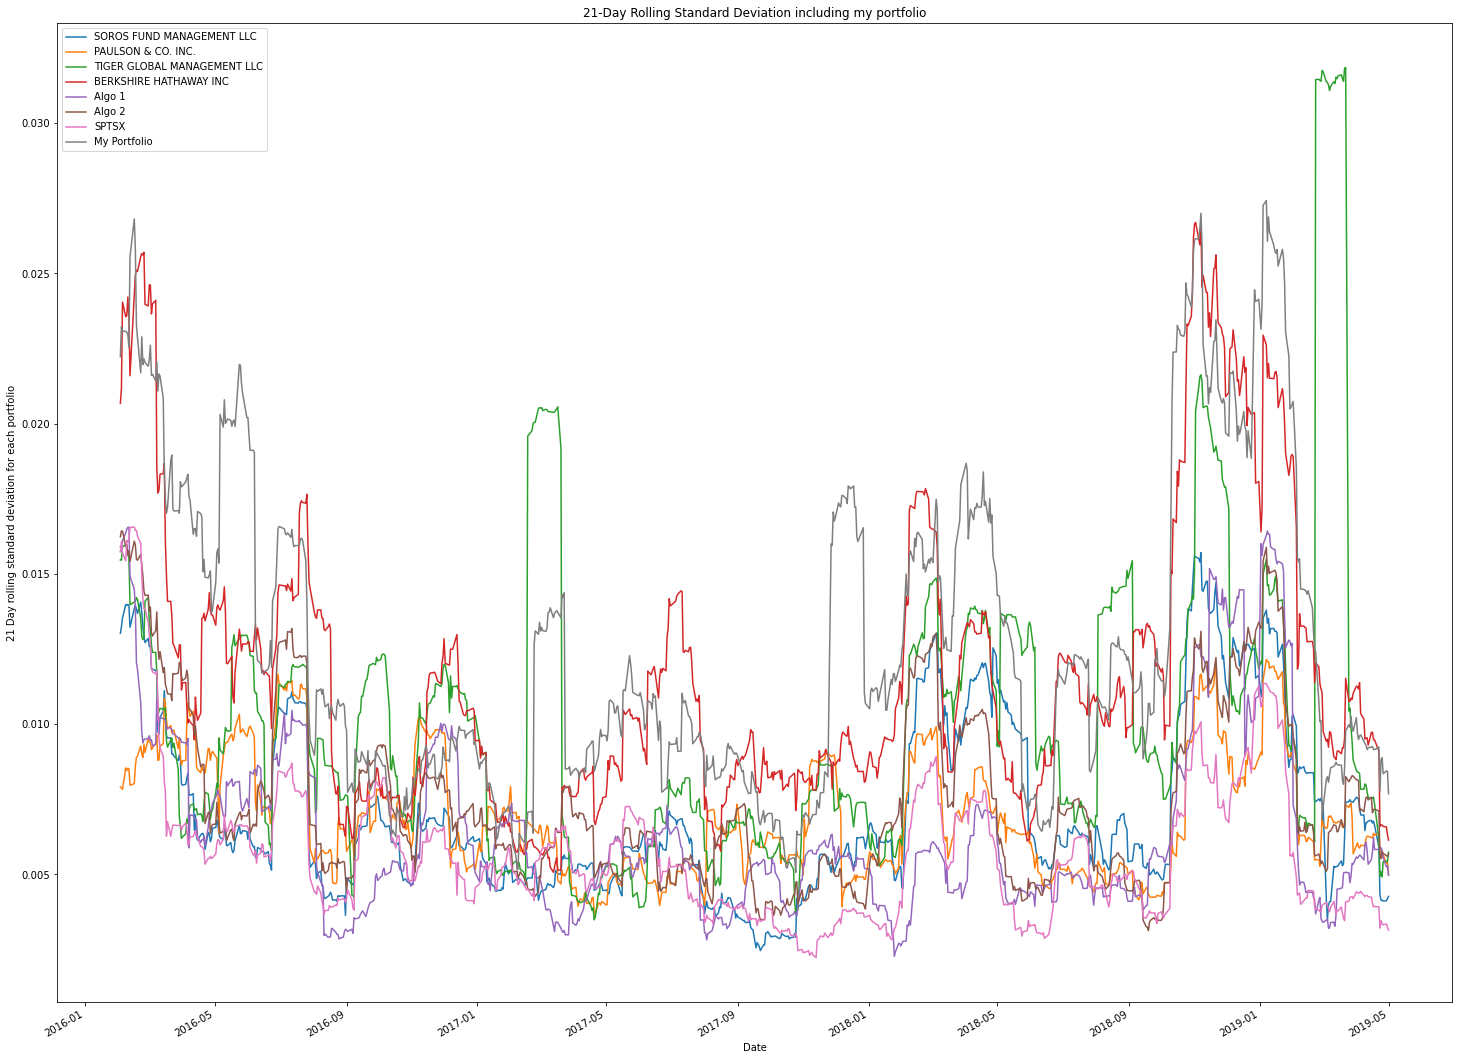

In [149]:
# # Using the rolling function with window of 21 days and the std () function to determine the rolling standard deviation for each portfolio including my portfolio 
myportfolio_rolling_std_21 = myportfolio_combined.rolling(window=21).std()
# Plot the rolling standard deviation with x-axis equals to Date and y axis equals to rolling standard deviation of 21 days for each portfolio
myportfolio_rolling_std_21.plot(figsize=(25,20),title="21-Day Rolling Standard Deviation including my portfolio", ylabel = "21 Day rolling standard deviation for each portfolio")



### Calculate and plot the correlation

<AxesSubplot:>

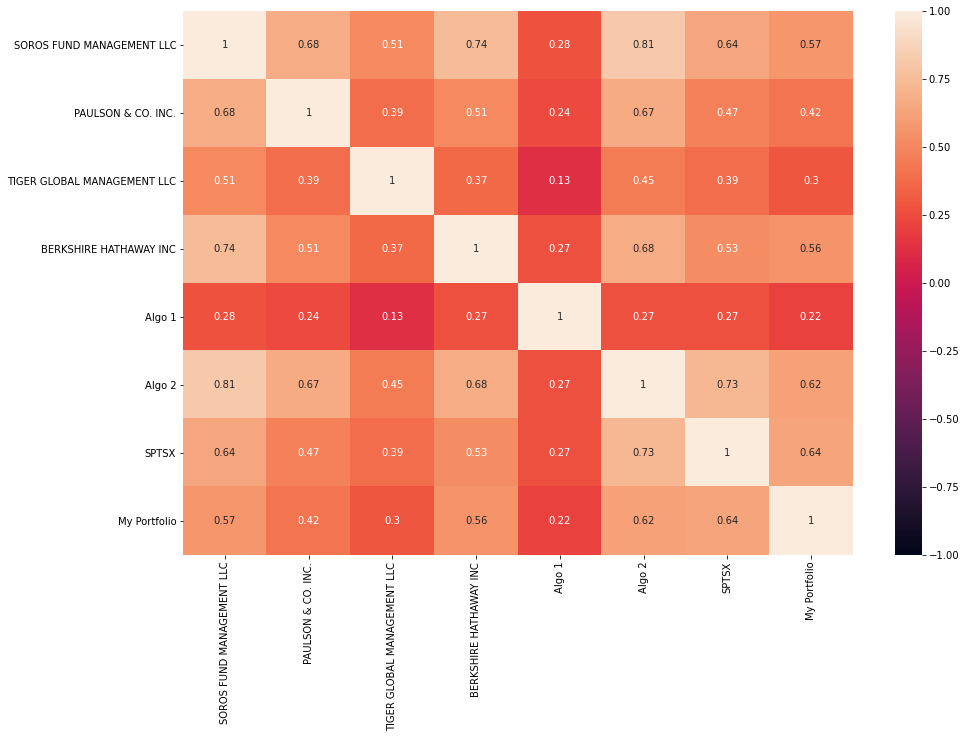

In [150]:
# Calculate the correlation among all portfolios by the function of corr() and using matplotlib to enlarge the output of heatmap for the results of correlation
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
myport_correlation = myportfolio_combined.corr()
myport_correlation

# Display the correlation matrix using the heatmap with the visual tool of seaborn to plot the correlation matrix 
import seaborn as sns
sns.heatmap(myport_correlation,vmin=-1,vmax=1,annot=True)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

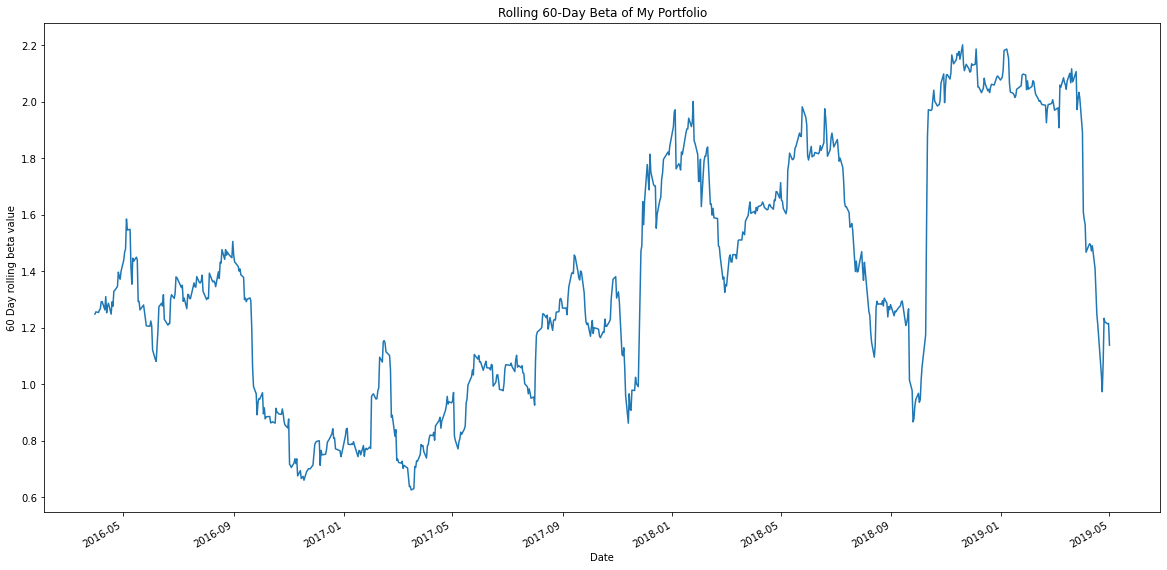

In [151]:
# Calculate rolling covariance between my own portfolio and the market benchmark S&P TSX 60 using the rolling windows of 60 days and cov() function
rolling_convariance_myportfolio = myportfolio_overall_return.rolling(window=60).cov(myportfolio_combined["SPTSX"])
# Calculate variance of S&P TSX using the rolling windows of 60 days and var () function
rolling_variance_SPTSX = myportfolio_combined["SPTSX"].rolling(window=60).var()
# Computing 60 day rolling beta by dividing 60 day rolling covariance of my portforlio with S&P TSX 60 from the 60 day rolling variance of S&P TSX 60
rolling_myportfolio_beta = rolling_convariance_myportfolio/rolling_variance_SPTSX
# Plotting 60 day rolling beta value of my portfolio with time; x-axis = Date and y-axis = 60 day rolling beta values
ax = rolling_myportfolio_beta.plot(figsize=(20,10), title = "Rolling 60-Day Beta of My Portfolio", ylabel = "60 Day rolling beta value")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [152]:
# Annualized Sharpe Ratios
#Assumption: Risk-free is near zero in the low interest rate environment, so we will assume risk free rate would be zero in our calculation, and the rate of return of each of the portfolios in the dataframe 
# has to be annualized with 252 trading days and the denominator (daily standard deviation of the combined portfolios) also has to be annualized with 252 days to compute the annual Sharpe Ratio
# for my portfolio
myportfolio_sharpe_ratio = ((myportfolio_combined.mean()-0)*252)/(myportfolio_combined.std()*np.sqrt(252))
myportfolio_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.355546
PAULSON & CO. INC.            -0.605629
TIGER GLOBAL MANAGEMENT LLC   -0.210963
BERKSHIRE HATHAWAY INC         0.567804
Algo 1                         1.345652
Algo 2                         0.653865
SPTSX                          0.759414
My Portfolio                   1.353533
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio including my own portfolio'}, xlabel=' Name of the Portfolio', ylabel='Sharpe Ratio of the portfolio'>

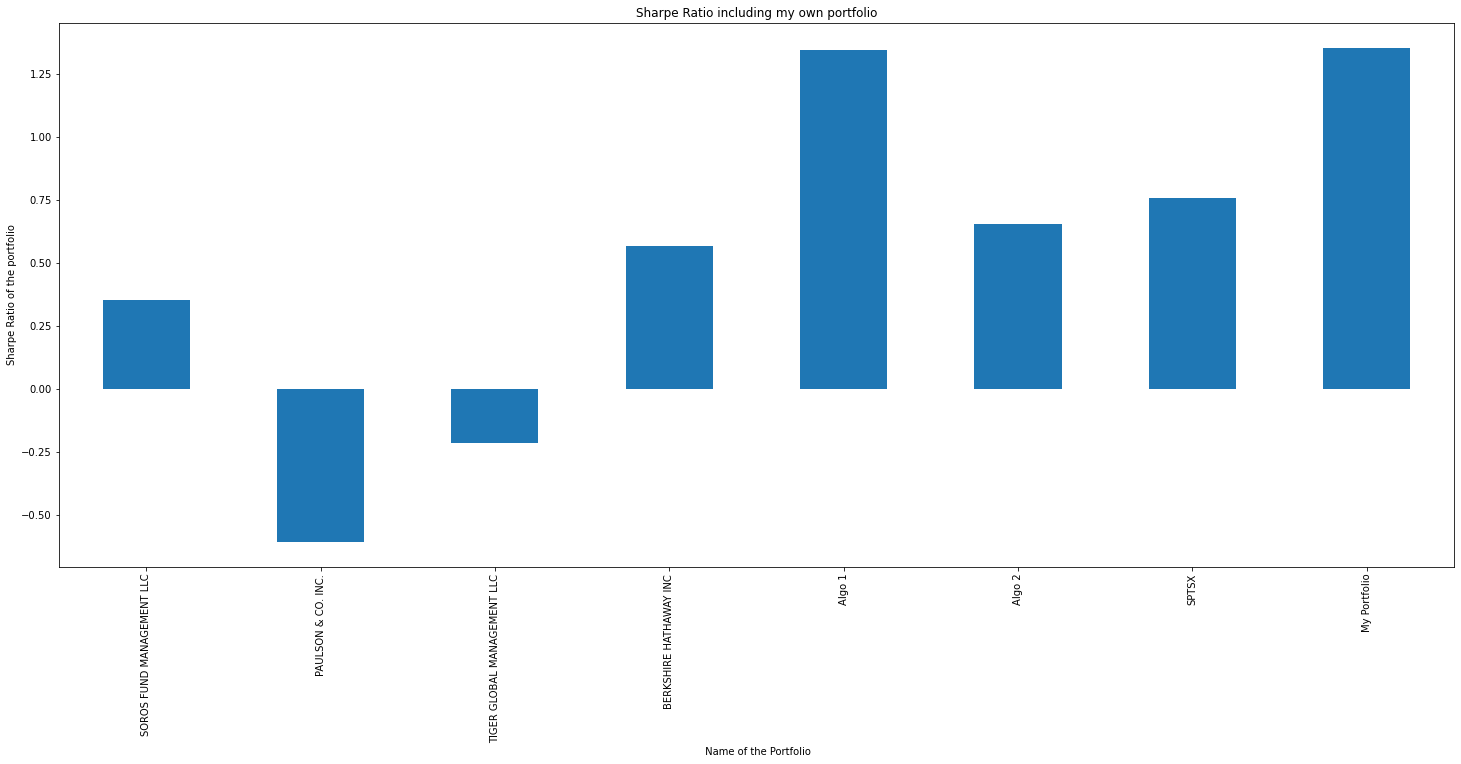

In [153]:
# Using the plot function to plot the bar charts for the Sharpe Ratio for each portfolio including my portfolio; x axis = Name of the portfolio and y axis = Sharpe Ratio for each portfolio
myportfolio_sharpe_ratio.plot(kind="bar",title="Sharpe Ratio including my own portfolio", figsize=(25,10), xlabel=" Name of the Portfolio", ylabel ="Sharpe Ratio of the portfolio")

### How does your portfolio do?

My porfolio is composed of 3 stocks: Royal Bank (RY), Suncor Canada (SU.TO) and Sqaure (SQ).  The analysis was based on the time frame from May 2016 to May 2019 in which all portfolios have returns data including my selected stocks.  The sharpe ratio for my portfolio is 1.3535 which is slightly higher than the Algo 1.  It is the highest among other portfolios in this analysis.  As a result, the selected stocks can outperform the general market (SP-60TSX) and it should be a better investment choice in term of Sharpe Ratio calcuation. 